CODE BLOCK: 1

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {"image_size":(28,28),
                         "random_rotation_angle":(-5.0, 5.0),
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,)
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


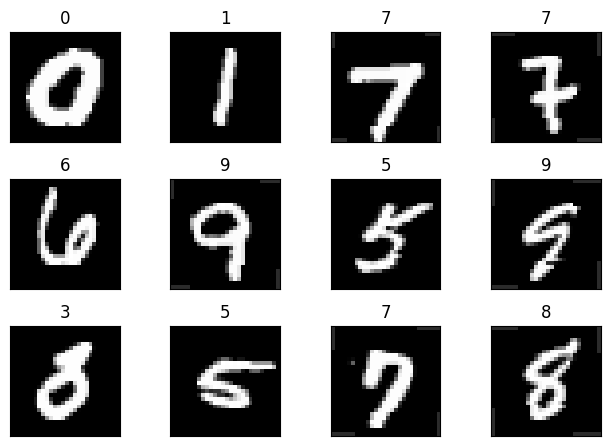

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
       BatchNorm2d-2            [-1, 4, 26, 26]               8
              ReLU-3            [-1, 4, 26, 26]               0
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5            [-1, 8, 24, 24]             288
       BatchNorm2d-6            [-1, 8, 24, 24]              16
              ReLU-7            [-1, 8, 24, 24]               0
           Dropout-8            [-1, 8, 24, 24]               0
            Conv2d-9           [-1, 12, 22, 22]             864
      BatchNorm2d-10           [-1, 12, 22, 22]              24
             ReLU-11           [-1, 12, 22, 22]               0
          Dropout-12           [-1, 12, 22, 22]               0
           Conv2d-13           [-1, 16, 20, 20]           1,728
      BatchNorm2d-14           [-1, 16,

In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "step_size":6,
                       "gamma":0.3,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0264 Batch_id=937 Accuracy=89.40: 100%|██████████| 938/938 [00:53<00:00, 17.54it/s]


Test set: Average loss: 0.0644, Accuracy: 9829/10000 (98.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0704 Batch_id=937 Accuracy=97.71: 100%|██████████| 938/938 [00:51<00:00, 18.10it/s]


Test set: Average loss: 0.0421, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0167 Batch_id=937 Accuracy=98.18: 100%|██████████| 938/938 [00:51<00:00, 18.33it/s]


Test set: Average loss: 0.0406, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0516 Batch_id=937 Accuracy=98.42: 100%|██████████| 938/938 [00:51<00:00, 18.21it/s]


Test set: Average loss: 0.0301, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0046 Batch_id=937 Accuracy=98.58: 100%|██████████| 938/938 [00:51<00:00, 18.32it/s]


Test set: Average loss: 0.0318, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0525 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [00:50<00:00, 18.48it/s]


Test set: Average loss: 0.0297, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 7


Train: Loss=0.0153 Batch_id=937 Accuracy=99.04: 100%|██████████| 938/938 [00:50<00:00, 18.50it/s]


Test set: Average loss: 0.0205, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 8


Train: Loss=0.0036 Batch_id=937 Accuracy=99.10: 100%|██████████| 938/938 [00:51<00:00, 18.39it/s]


Test set: Average loss: 0.0191, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 9


Train: Loss=0.0207 Batch_id=937 Accuracy=99.13: 100%|██████████| 938/938 [00:51<00:00, 18.24it/s]


Test set: Average loss: 0.0197, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 10


Train: Loss=0.0012 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [00:51<00:00, 18.28it/s]


Test set: Average loss: 0.0190, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 11


Train: Loss=0.0283 Batch_id=937 Accuracy=99.15: 100%|██████████| 938/938 [00:51<00:00, 18.27it/s]


Test set: Average loss: 0.0183, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 12


Train: Loss=0.0102 Batch_id=937 Accuracy=99.16: 100%|██████████| 938/938 [00:51<00:00, 18.11it/s]


Test set: Average loss: 0.0177, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 13


Train: Loss=0.0013 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:51<00:00, 18.39it/s]


Test set: Average loss: 0.0168, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 14


Train: Loss=0.1488 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:50<00:00, 18.47it/s]


Test set: Average loss: 0.0168, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 15


Train: Loss=0.0021 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:51<00:00, 18.26it/s]


Test set: Average loss: 0.0163, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 16


Train: Loss=0.0356 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:50<00:00, 18.47it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 17


Train: Loss=0.0163 Batch_id=937 Accuracy=99.33: 100%|██████████| 938/938 [00:51<00:00, 18.27it/s]


Test set: Average loss: 0.0165, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 18


Train: Loss=0.0017 Batch_id=937 Accuracy=99.31: 100%|██████████| 938/938 [00:51<00:00, 18.13it/s]


Test set: Average loss: 0.0173, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 2.7000e-04.
Epoch 19


Train: Loss=0.0515 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:50<00:00, 18.47it/s]


Test set: Average loss: 0.0171, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 2.7000e-04.
Epoch 20


Train: Loss=0.0047 Batch_id=937 Accuracy=99.39: 100%|██████████| 938/938 [00:50<00:00, 18.53it/s]


Test set: Average loss: 0.0160, Accuracy: 9952/10000 (99.52%)

Adjusting learning rate of group 0 to 2.7000e-04.


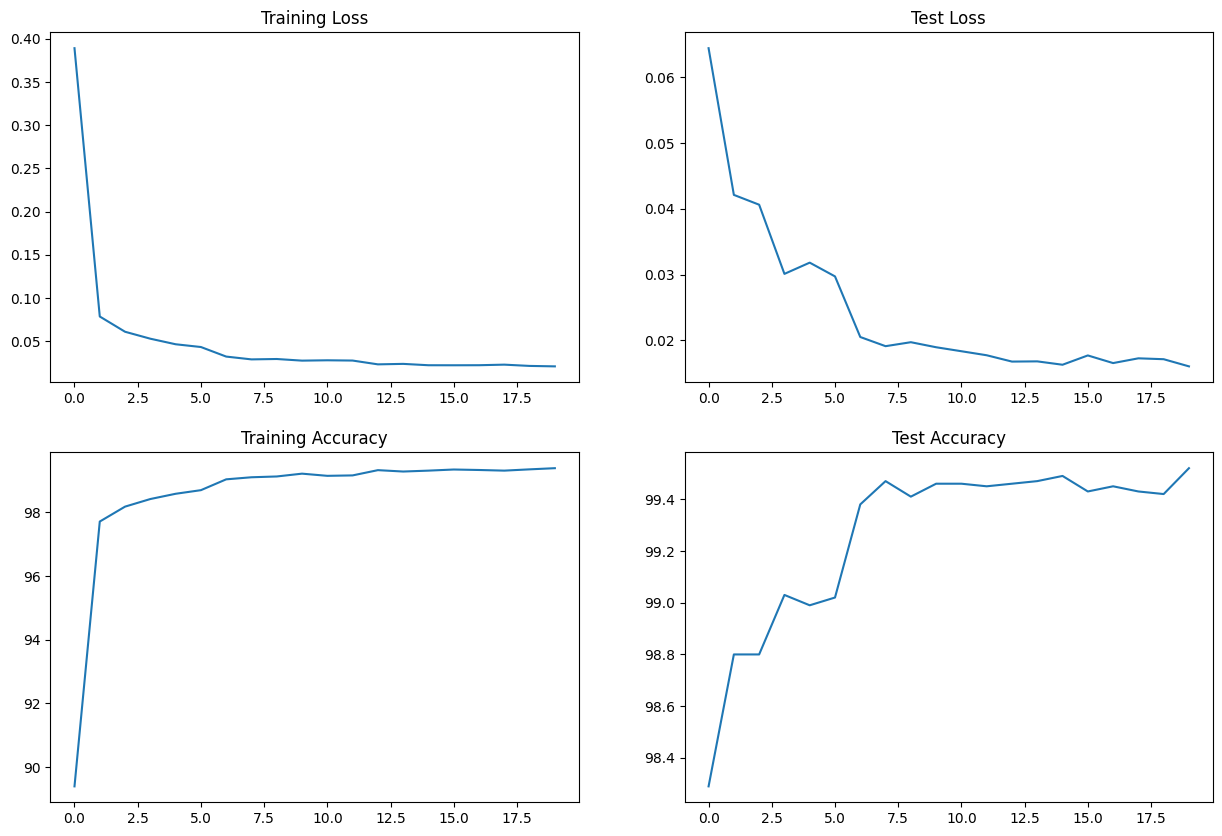

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

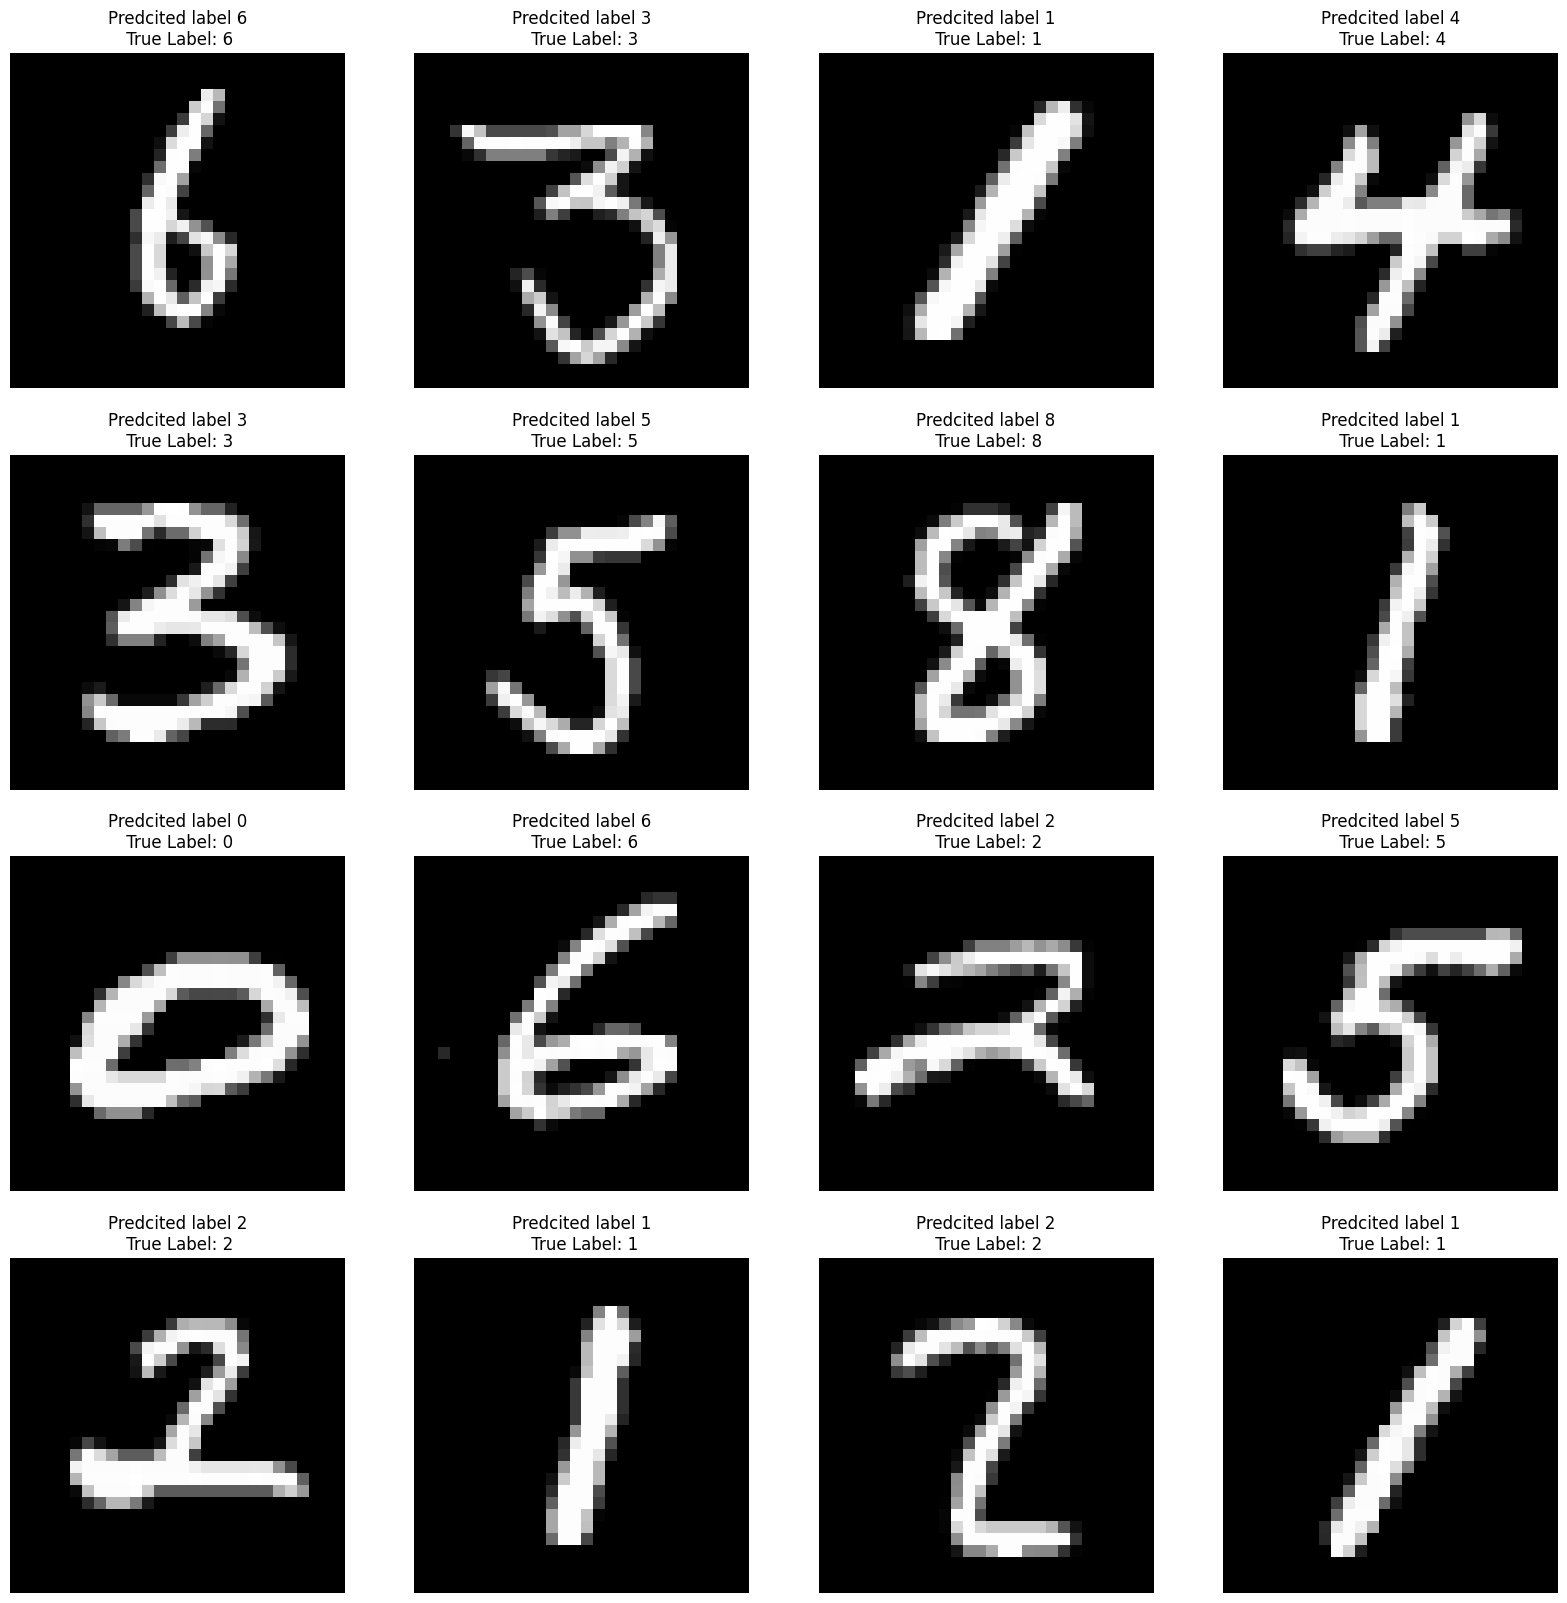

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

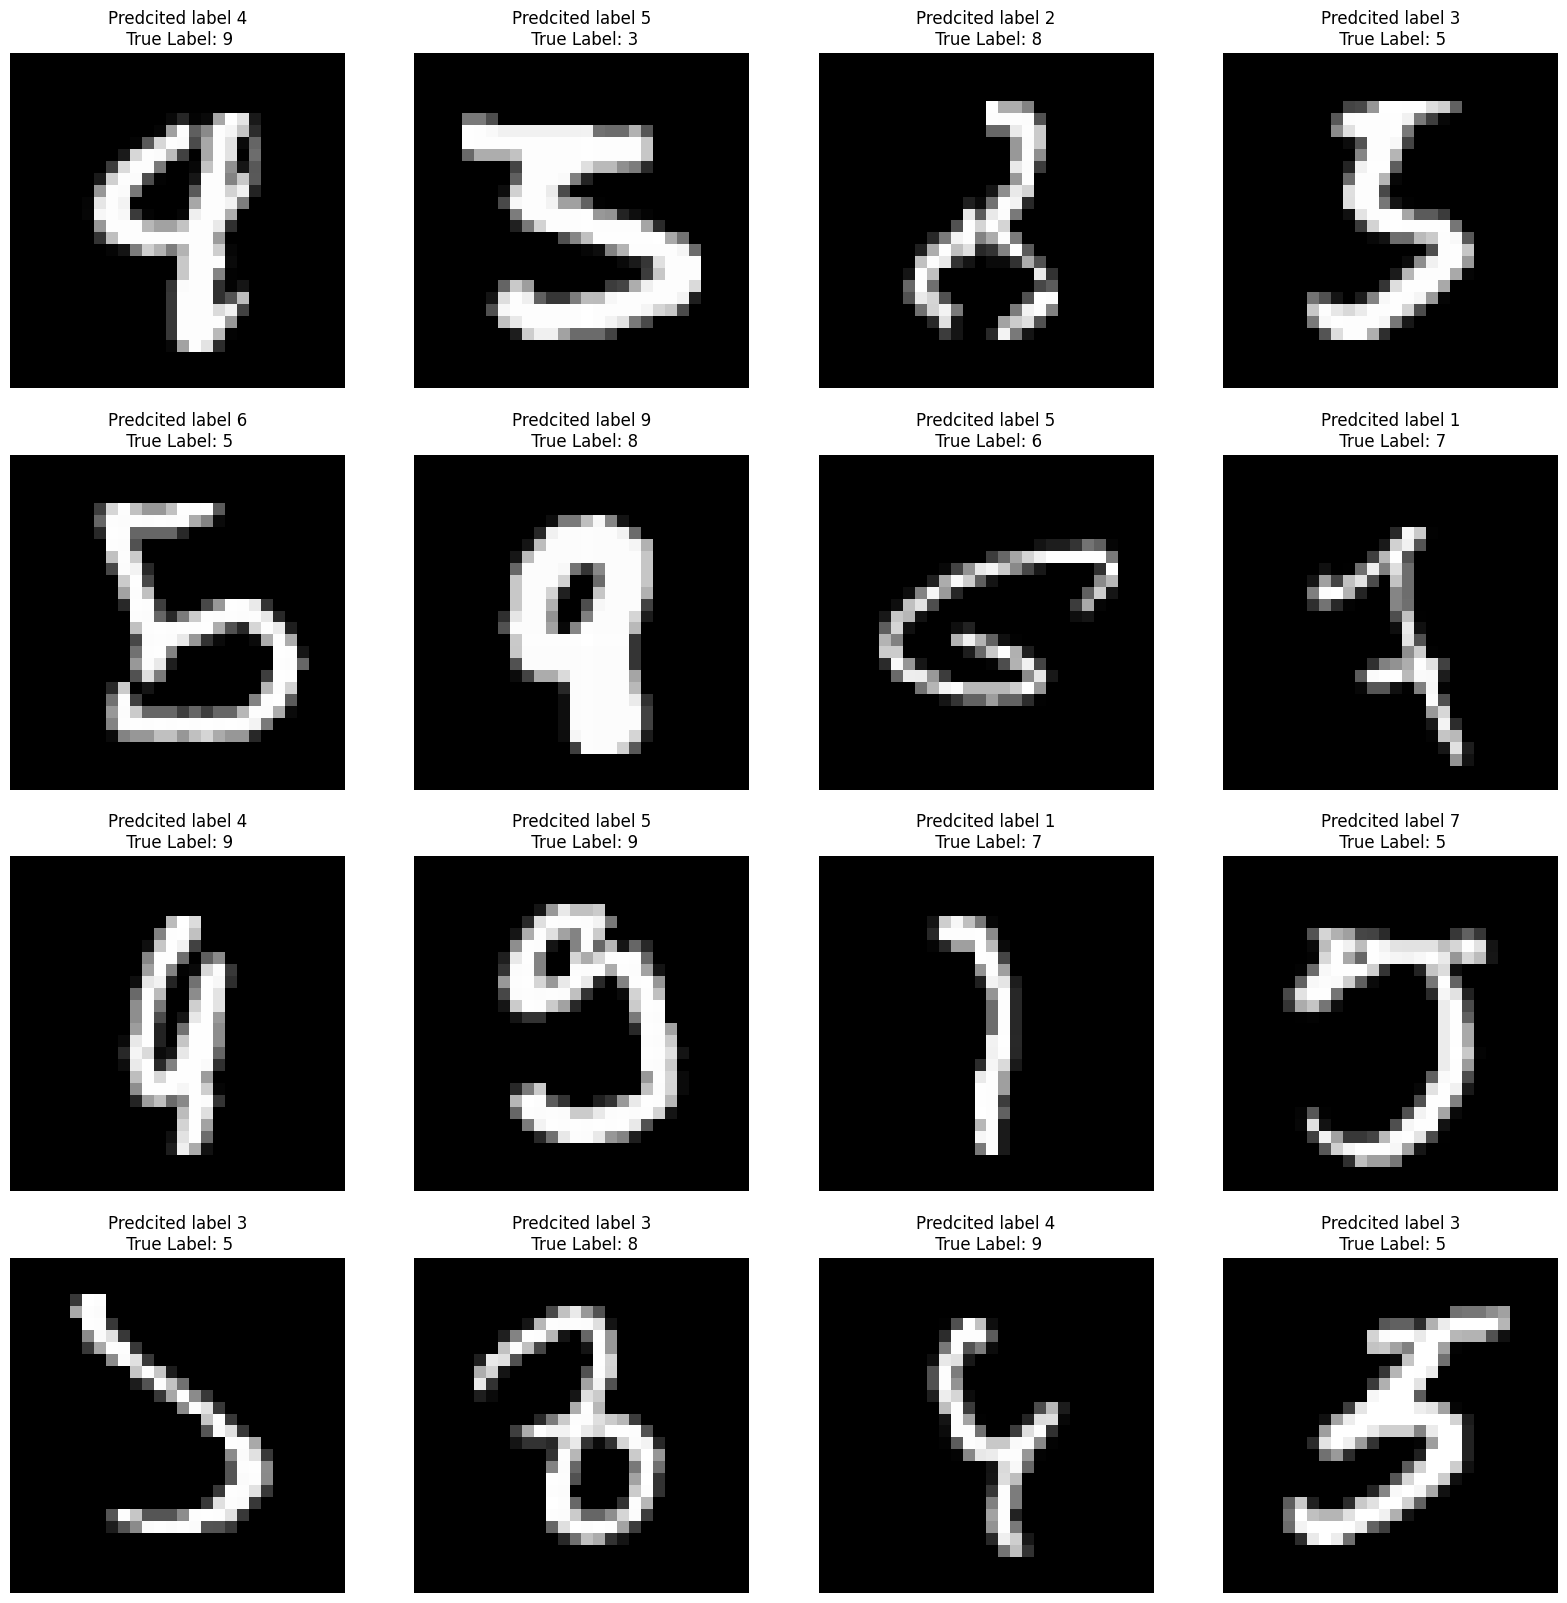

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 100 %
Accuracy of 1 - one : 99 %
Accuracy of 2 - two : 99 %
Accuracy of 3 - three : 100 %
Accuracy of 4 - four : 98 %
Accuracy of 5 - five : 99 %
Accuracy of 6 - six : 98 %
Accuracy of 7 - seven : 100 %
Accuracy of 8 - eight : 100 %
Accuracy of 9 - nine : 98 %


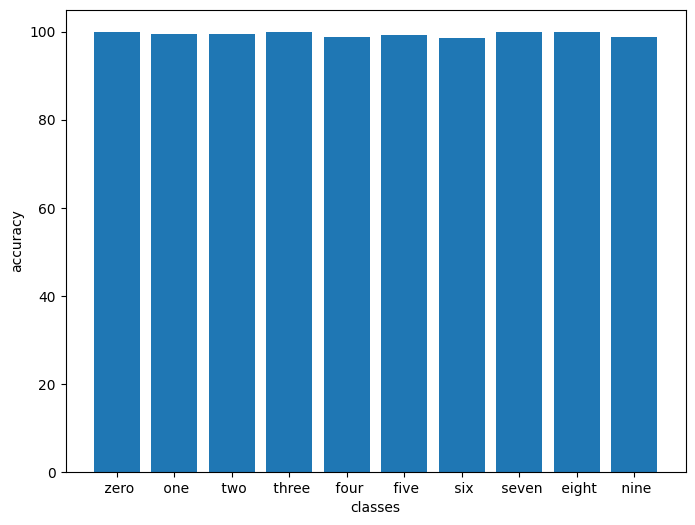

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)